## Statistical Consulting [G0B66a]

### Project Heart
#### Marios Eftychiou (r0868949)

### Load packages

In [1]:
import os

import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

C:\Users\35799\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Load data

In [2]:
cwd = os.getcwd()

In [3]:
data = pd.read_excel(cwd+"/heart_2020.xlsx")

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Exploratory Data Analysis

#### Types of data in the data set

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There are two types of data in the dataset:
- continuous (float)
- categorical (object)

In [6]:
categorical = []
continuous = []

columns = list(data.columns)

for column in columns:
    if (len(data.loc[:,column].unique()) >= 20):
        continuous.append(column)
    else:
        categorical.append(column)

#### Checking for missing values

In [7]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There are no missing values in the dataset.

#### Continuous data statistics

In [8]:
round(data[continuous].describe(), 3)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000,319795.000,319795.000,319795.000
mean,28.325,3.372,3.898,7.097
std,6.356,7.951,7.955,1.436
min,12.020,0.000,0.000,1.000
25%,24.030,0.000,0.000,6.000
50%,27.340,0.000,0.000,7.000
75%,31.420,2.000,3.000,8.000
max,94.850,30.000,30.000,24.000


#### Categotrical data

In [9]:
for i, column in enumerate(categorical):
    print(f"{i+1}: {column} {data[column].unique()}")

1: HeartDisease ['No' 'Yes']
2: Smoking ['Yes' 'No']
3: AlcoholDrinking ['No' 'Yes']
4: Stroke ['No' 'Yes']
5: DiffWalking ['No' 'Yes']
6: Sex ['Female' 'Male']
7: AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
8: Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
9: Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
10: PhysicalActivity ['Yes' 'No']
11: GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
12: Asthma ['Yes' 'No']
13: KidneyDisease ['No' 'Yes']
14: SkinCancer ['Yes' 'No']


In [10]:
for i, column in enumerate(categorical):
    print(f"{i+1} {column}:")
    print(data[column].value_counts());
    print("\n")

1 HeartDisease:
No     292422
Yes     27373
Name: HeartDisease, dtype: int64


2 Smoking:
No     187887
Yes    131908
Name: Smoking, dtype: int64


3 AlcoholDrinking:
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


4 Stroke:
No     307726
Yes     12069
Name: Stroke, dtype: int64


5 DiffWalking:
No     275385
Yes     44410
Name: DiffWalking, dtype: int64


6 Sex:
Female    167805
Male      151990
Name: Sex, dtype: int64


7 AgeCategory:
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64


8 Race:
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alask

#### Percentage of patients with Heart Disease

In [11]:
percentage = round((data["HeartDisease"].value_counts()[1])/(data["HeartDisease"].value_counts()[0]+data["HeartDisease"].value_counts()[1]), 3)

In [12]:
percentage

0.086

The dataset is unbalanced as only 8% of the pateinets have reported having coronary heart disease (CHD) or myocardial infarction (MI).

#### Data Cleaning

Categorical variables are dummy coded.

In [13]:
# categorical variables converted to dummy
heart_disease_dummy = {'No':0,'Yes':1}
smoking_dummy = {'No':0,'Yes':1}
alcohol_drinking_dummy = {'No':0,'Yes':1}
stroke_dummy = {'No':0,'Yes':1}
diff_walking_dummy = {'No':0,'Yes':1}
sex_dummy = {'Female':0,'Male':1}
age_categoty_dummy = {'18-24':0, '25-29':1,'30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8, '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
race_dummy = {'White':0,'Black':1, 'Asian':2, 'American Indian/Alaskan Native':3, 'Hispanic':4, 'Other':5}
diabetic_dummy = {'No':0,'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
physical_activity_dummy = {'No':0,'Yes':1}
genhealth_dummy = {'Poor':0,'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
asthma_dummy = {'No':0,'Yes':1}
kidney_disease_dummy = {'No':0,'Yes':1}
skin_cancer_dummy = {'No':0,'Yes':1}

data_clean = data.copy()
data_clean['HeartDisease']=data['HeartDisease'].replace(heart_disease_dummy)
data_clean['Smoking']=data['Smoking'].replace(smoking_dummy)
data_clean['AlcoholDrinking']=data['AlcoholDrinking'].replace(alcohol_drinking_dummy)
data_clean['Stroke']=data['Stroke'].replace(stroke_dummy)
data_clean['DiffWalking']=data['DiffWalking'].replace(diff_walking_dummy)
data_clean['Sex']=data['Sex'].replace(sex_dummy)
data_clean['AgeCategory']=data['AgeCategory'].replace(age_categoty_dummy)
data_clean['Race']=data['Race'].replace(race_dummy)
data_clean['Diabetic']=data['Diabetic'].replace(diabetic_dummy)
data_clean['PhysicalActivity']=data['PhysicalActivity'].replace(physical_activity_dummy)
data_clean['GenHealth']=data['GenHealth'].replace(genhealth_dummy)
data_clean['Asthma']=data['Asthma'].replace(asthma_dummy)
data_clean['KidneyDisease']=data['KidneyDisease'].replace(kidney_disease_dummy)
data_clean['SkinCancer']=data['SkinCancer'].replace(skin_cancer_dummy)

In [14]:
data_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0


#### Plots

##### Continuous Variables

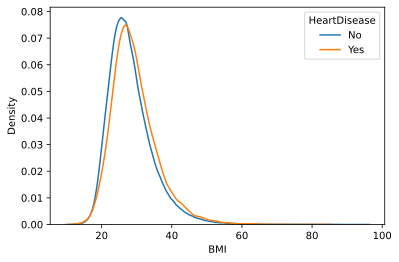

In [15]:
bmi_no = data[data["HeartDisease"]=="No"]
bmi_yes = data[data["HeartDisease"]=="Yes"]
sns.distplot(bmi_no["BMI"], hist=False);
sns.distplot(bmi_yes["BMI"], hist= False);
plt.legend(labels=["No", "Yes"], title="HeartDisease");

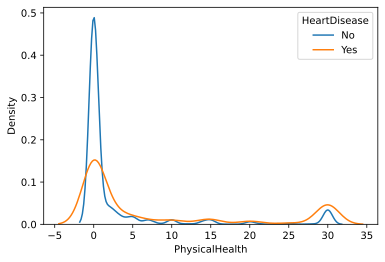

In [16]:
ph_no = data[data["HeartDisease"]=="No"]
ph_yes = data[data["HeartDisease"]=="Yes"]
sns.distplot(ph_no["PhysicalHealth"], hist=False);
sns.distplot(ph_yes["PhysicalHealth"], hist= False);
plt.legend(labels=["No", "Yes"], title="HeartDisease");

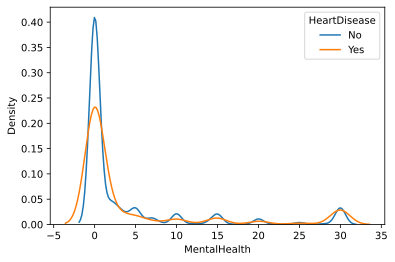

In [17]:
mh_no = data[data["HeartDisease"]=="No"]
mh_yes = data[data["HeartDisease"]=="Yes"]
sns.distplot(mh_no["MentalHealth"], hist=False);
sns.distplot(mh_yes["MentalHealth"], hist= False);
plt.legend(labels=["No", "Yes"], title="HeartDisease");

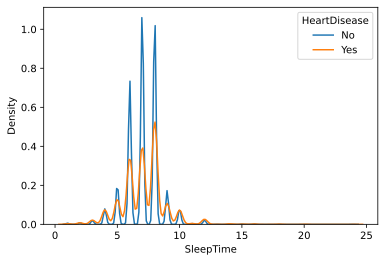

In [18]:
st_no = data[data["HeartDisease"]=="No"]
st_yes = data[data["HeartDisease"]=="Yes"]
sns.distplot(st_no["SleepTime"], hist=False);
sns.distplot(st_yes["SleepTime"], hist= False);
plt.legend(labels=["No", "Yes"], title="HeartDisease");

##### Categorical Variables

100%|██████████| 8/8 [00:01<00:00,  5.31it/s]


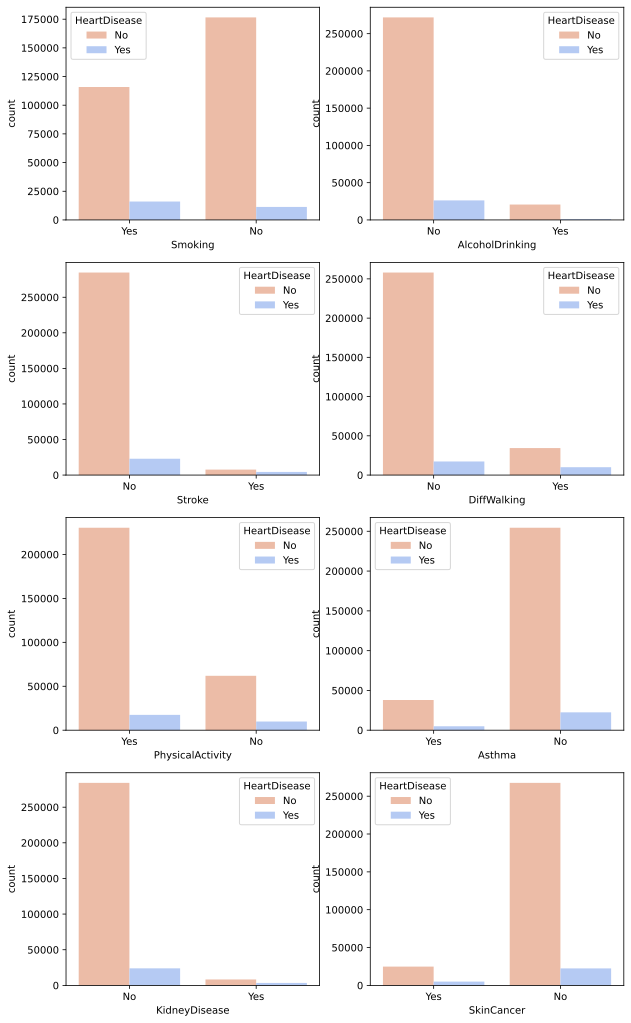

In [19]:
variables = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

fig, axs = plt.subplots(4, 2, figsize=(10, 18))

i = 0
j = 0

for var in tqdm(variables):
    sns.countplot(ax=axs[i,j], x=var, data=data, hue='HeartDisease', palette="coolwarm_r")
    # sns.histplot(ax=axs[i,j], data=data, x=var, hue = "HeartDisease", multiple="stack", hue_order = ["No", "Yes"])
    j = j + 1
    if (j > 1):
        j = 0
        i = i + 1

In [20]:
variables = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
ratios = {}

for column in variables:
    no_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="No")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="No")])
    yes_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Yes")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Yes")])
    ratios.update({column:[round(no_ratio,3), round(yes_ratio,3)]})
    
ratios_df = pd.DataFrame(ratios, index=["No", "Yes"])
ratios_df

,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
No,0.064,0.097,0.081,0.067,0.160,0.088,0.084,0.084
Yes,0.138,0.055,0.571,0.292,0.076,0.130,0.415,0.200


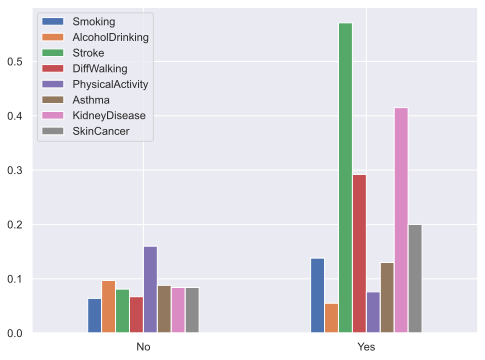

In [21]:
sns.set(rc={'figure.figsize':(8,6)})
ratios_df.plot(kind="bar");
plt.xticks(rotation=0);

Observations:
- There are more people with CHD or MI in the "Yes" smoking group.
- There are less people with CHD or MI in the "Yes" alcohol drinking group.
- There are more people with walking difficulties that also have CHD or MI.
- Active people experience less CHD or MI.
- There are more people with other health problems (Stroke, Asthma, Kidney Disease, Cancer) that also have CHD or MI.

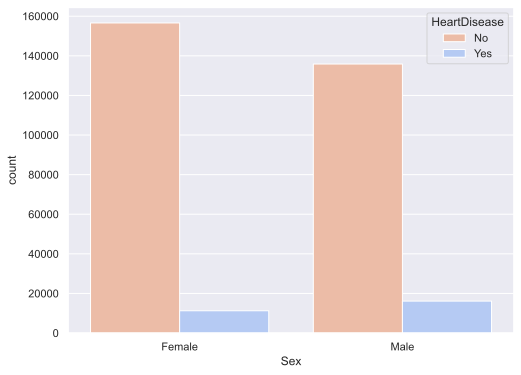

In [22]:
sns.countplot(x='Sex', data=data, hue='HeartDisease', palette="coolwarm_r");

In [23]:
variables = ["Sex"]
ratios = {}

for column in variables:
    female_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Female")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Female")])
    men_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Male")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Male")])
    ratios.update({column:[round(female_ratio,3), round(men_ratio,3)]})
    
ratios_df = pd.DataFrame(ratios, index=["Female", "Male"])
ratios_df

,Sex
Female,0.072
Male,0.119


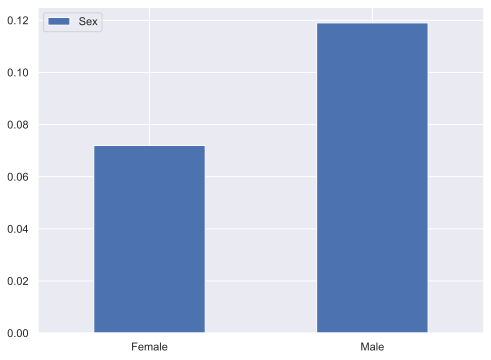

In [24]:
sns.set(rc={'figure.figsize':(8,6)})
ratios_df.plot(kind="bar");
plt.xticks(rotation=0);

Observations:
- Men experience more CHD or MI.

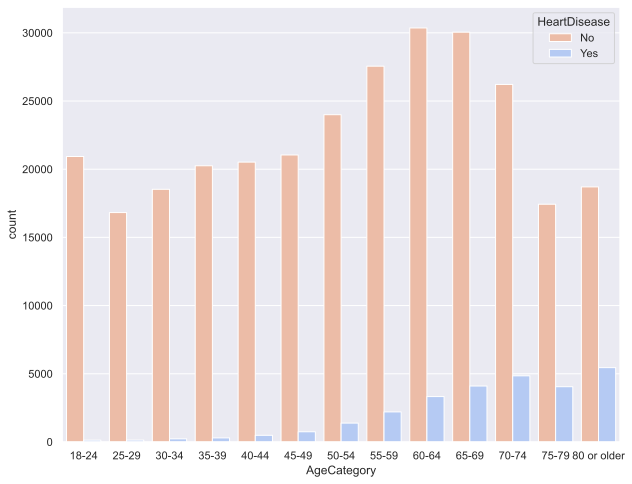

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='AgeCategory', data=data, hue='HeartDisease', palette="coolwarm_r", order=['18-24', '25-29','30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']);

In [26]:
variables = ["AgeCategory"]
ratios = {}

for column in variables:
    ratio1 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="18-24")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="18-24")])
    ratio2 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="25-29")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="25-29")])
    ratio3 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="30-34")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="30-34")])
    ratio4 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="35-39")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="35-39")])
    ratio5 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="40-44")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="40-44")])
    ratio6 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="45-49")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="45-49")])
    ratio7 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="50-54")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="50-54")])
    ratio8 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="55-59")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="55-59")])
    ratio9 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="60-64")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="60-64")])
    ratio10 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="65-69")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="65-69")])
    ratio11 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="70-74")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="70-74")])
    ratio12 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="75-79")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="75-79")])
    ratio13 = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="80 or older")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="80 or older")])
    ratios.update({column:[round(ratio1,3), round(ratio2,3), round(ratio3,3), round(ratio4,3), round(ratio5,3), round(ratio6,3), round(ratio7,3), round(ratio8,3),
                           round(ratio9,3), round(ratio10,3), round(ratio11,3), round(ratio12,3), round(ratio13,3)]})
    
ratios_df = pd.DataFrame(ratios, index=["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"])
ratios_df

,AgeCategory
18-24,0.006
25-29,0.008
30-34,0.012
35-39,0.015
40-44,0.024
45-49,0.035
50-54,0.058
55-59,0.080
60-64,0.110
65-69,0.136


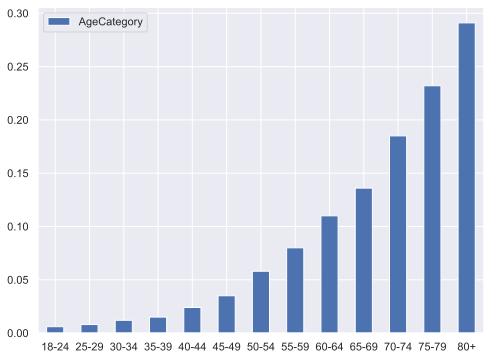

In [27]:
sns.set(rc={'figure.figsize':(8,6)})
ratios_df.plot(kind="bar");
plt.xticks(rotation=0);

Observations:
- Older people experience more CHD or MI.

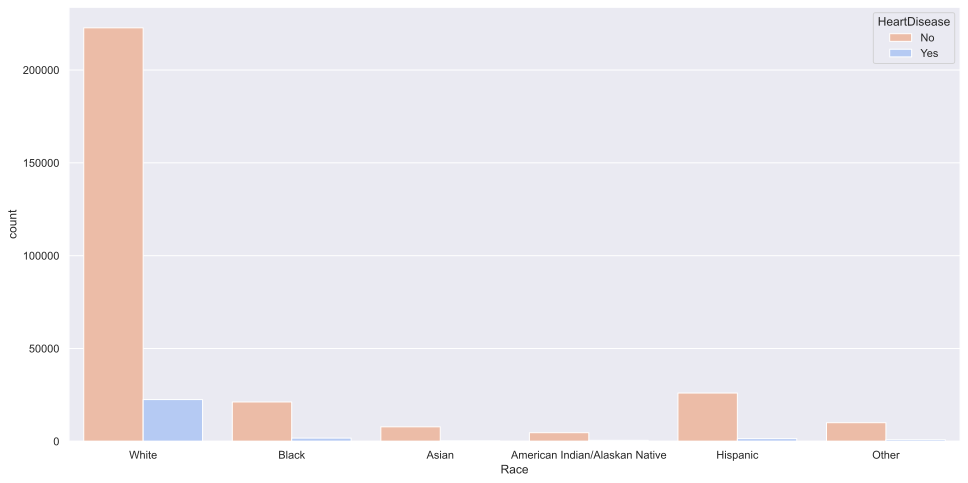

In [28]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='Race', data=data, hue='HeartDisease', palette="coolwarm_r", order=['White','Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic', 'Other']);

In [29]:
variables = ["Race"]
ratios = {}

for column in variables:
    white_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="White")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="White")])
    black_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Black")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Black")])
    asian_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Asian")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Asian")])
    native_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="American Indian/Alaskan Native")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="American Indian/Alaskan Native")])
    hispanic_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Hispanic")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Hispanic")])
    other_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Other")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Other")])
    ratios.update({column:[round(white_ratio,3), round(black_ratio,3), round(asian_ratio,3), round(native_ratio,3), round(hispanic_ratio,3), round(other_ratio,3)]})
    
ratios_df = pd.DataFrame(ratios, index=["White", "Black", "Asian", "Native", "Hispanic", "Other"])
ratios_df

,Race
White,0.101
Black,0.082
Asian,0.034
Native,0.116
Hispanic,0.055
Other,0.088


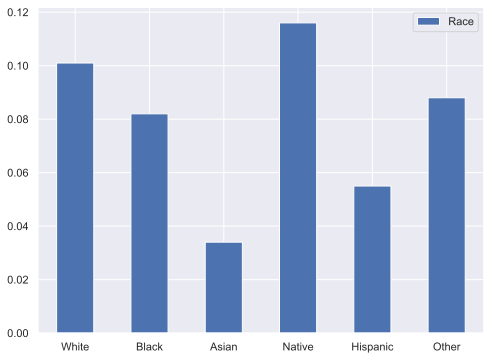

In [30]:
sns.set(rc={'figure.figsize':(8,6)})
ratios_df.plot(kind="bar");
plt.xticks(rotation=0);

Observations:
- White and American Indian/Alaskan Native have the biggest CHD or MI ratios.
- Asian and Hisapnic has the smallest CHD or MI ratios.
- Black and Other have approximately the same CHD or MI ratio.

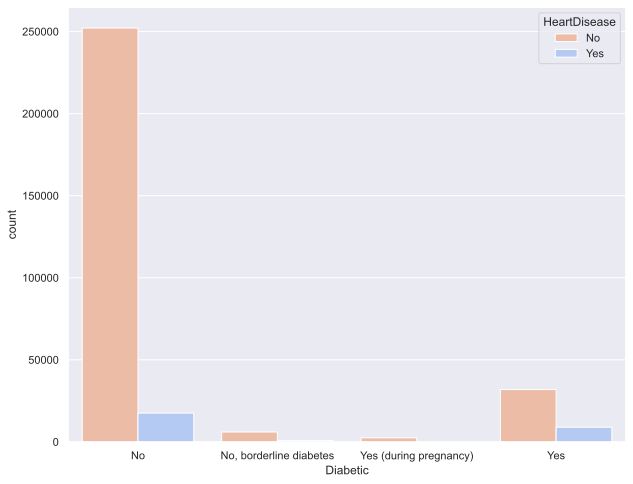

In [31]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='Diabetic', data=data, hue='HeartDisease', palette="coolwarm_r", order=['No','No, borderline diabetes', 'Yes (during pregnancy)', 'Yes']);

In [32]:
variables = ["Diabetic"]
ratios = {}

for column in variables:
    no_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="No")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="No")])
    border_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="No, borderline diabetes")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="No, borderline diabetes")])
    pregnancy_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Yes (during pregnancy)")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Yes (during pregnancy)")])
    yes_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Yes")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Yes")])
    ratios.update({column:[round(no_ratio,3), round(border_ratio,3), round(pregnancy_ratio,3), round(yes_ratio,3)]})
    
ratios_df = pd.DataFrame(ratios, index=["No", "Borderline", "Pregnancy", "Yes"])
ratios_df

,Diabetic
No,0.069
Borderline,0.132
Pregnancy,0.044
Yes,0.281


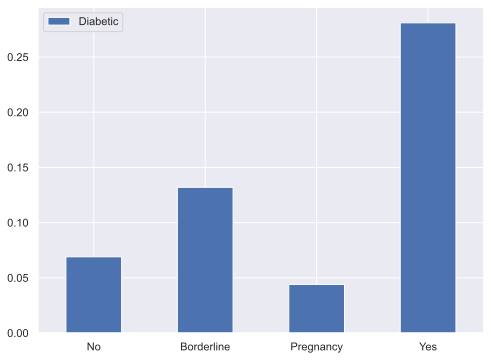

In [33]:
sns.set(rc={'figure.figsize':(8,6)})
ratios_df.plot(kind="bar");
plt.xticks(rotation=0);

Observations:
- Diabetics have the biggest CHD or MI ratio.
- Yes (during pregnancy) group has the smallest CHD or MI ratio.

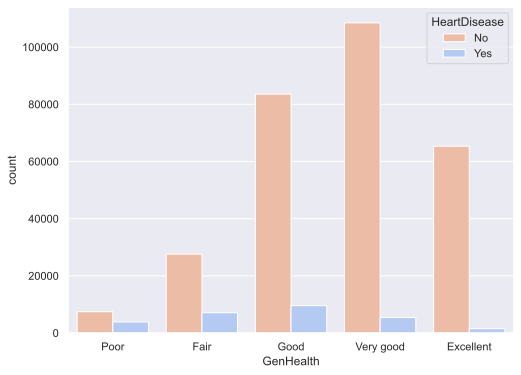

In [34]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x='GenHealth', data=data, hue='HeartDisease', palette="coolwarm_r", order=['Poor','Fair', 'Good', 'Very good', 'Excellent']);

In [35]:
variables = ["GenHealth"]
ratios = {}

for column in variables:
    poor_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Poor")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Poor")])
    fair_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Fair")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Fair")])
    good_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Good")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Good")])
    very_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Very good")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Very good")])
    excellent_ratio = len(data[(data["HeartDisease"]=="Yes") & (data[column]=="Excellent")])/len(data[(data["HeartDisease"]=="No") & (data[column]=="Excellent")])
    ratios.update({column:[round(poor_ratio,3), round(fair_ratio,3), round(good_ratio,3), round(very_ratio,3), round(excellent_ratio,3)]})
    
ratios_df = pd.DataFrame(ratios, index=["Poor", "Fair", "Good", "Very good", "Excellent"])
ratios_df

,GenHealth
Poor,0.518
Fair,0.257
Good,0.114
Very good,0.050
Excellent,0.023


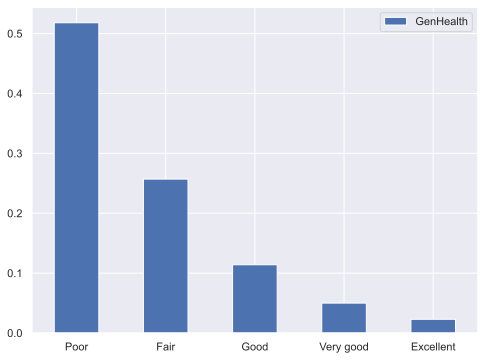

In [36]:
sns.set(rc={'figure.figsize':(8,6)})
ratios_df.plot(kind="bar");
plt.xticks(rotation=0);

Observations:
- People with poor general health have the biggest CHD or MI ratio.
- People with excellent general health have  the smallest CHD or MI ratio.

#### Correlation Matrix

In [37]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


### Modelling on a 10% sample of the full dataset

In [38]:
data_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0


In [39]:
data_sample = data_clean.sample(frac=0.1)

In [40]:
round((data_sample["HeartDisease"].value_counts()[1])/(data_sample["HeartDisease"].value_counts()[0]+data_sample["HeartDisease"].value_counts()[1]), 3)

0.085

In [41]:
X = data_sample.drop(columns=['HeartDisease'])
y = data_sample[['HeartDisease']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=0)

In [43]:
models = []
models.append(['XGBClassifier', GradientBoostingClassifier(learning_rate=0.1, random_state=0)])
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeigbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['DecisionTree', DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest', RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier', AdaBoostClassifier()])

In [44]:
lst_1 = []

for m in tqdm(range(len(models))):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    cm_df = pd.DataFrame(cm)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print('-'*25)
    print(f'{models[m][0]}:')
    print("Confusion Matrix:")
    print(cm_df)
    print(f'Accuracy: {round(accuracy, 3)}')
    print(f'Recall: {round(recall, 3)}')
    print(f'Presicion: {round(precision, 3)}')
    print('-'*25)
   
    lst_2.append(models[m][0])
    lst_2.append(accuracy)
    lst_2.append(recall)
    lst_2.append(precision)
    lst_1.append(lst_2)

 11%|█         | 1/9 [00:13<01:47, 13.38s/it]

-------------------------
XGBClassifier:
Confusion Matrix:
      0   1
0  8701  72
1   737  84
Accuracy: 0.916
Recall: 0.102
Presicion: 0.538
-------------------------


 22%|██▏       | 2/9 [00:14<00:43,  6.26s/it]

-------------------------
Logistic Regression:
Confusion Matrix:
      0    1
0  8686   87
1   719  102
Accuracy: 0.916
Recall: 0.124
Presicion: 0.54
-------------------------


 33%|███▎      | 3/9 [01:22<03:26, 34.46s/it]

-------------------------
SVM:
Confusion Matrix:
      0  1
0  8773  0
1   821  0
Accuracy: 0.914
Recall: 0.0
Presicion: 0.0
-------------------------


 56%|█████▌    | 5/9 [01:35<01:06, 16.56s/it]

-------------------------
KNeigbors:
Confusion Matrix:
      0    1
0  8662  111
1   766   55
Accuracy: 0.909
Recall: 0.067
Presicion: 0.331
-------------------------
-------------------------
GaussianNB:
Confusion Matrix:
      0     1
0  7666  1107
1   394   427
Accuracy: 0.844
Recall: 0.52
Presicion: 0.278
-------------------------


 67%|██████▋   | 6/9 [01:35<00:32, 10.98s/it]

-------------------------
BernoulliNB:
Confusion Matrix:
      0    1
0  8361  412
1   572  249
Accuracy: 0.897
Recall: 0.303
Presicion: 0.377
-------------------------


 78%|███████▊  | 7/9 [01:36<00:15,  7.62s/it]

-------------------------
DecisionTree:
Confusion Matrix:
      0    1
0  8111  662
1   610  211
Accuracy: 0.867
Recall: 0.257
Presicion: 0.242
-------------------------


 89%|████████▉ | 8/9 [01:48<00:09,  9.19s/it]

-------------------------
RandomForest:
Confusion Matrix:
      0   1
0  8678  95
1   731  90
Accuracy: 0.914
Recall: 0.11
Presicion: 0.486
-------------------------


100%|██████████| 9/9 [01:53<00:00, 12.61s/it]

-------------------------
AdaBoostClassifier:
Confusion Matrix:
      0    1
0  8662  111
1   713  108
Accuracy: 0.914
Recall: 0.132
Presicion: 0.493
-------------------------


### Model Hyperparameter Tuning

In [45]:
metrics = pd.DataFrame(lst_1, columns=['Model','Accuracy','Recall', 'Precision'])
metrics

,Model,Accuracy,Recall,Precision
0,XGBClassifier,0.915676,0.102314,0.538462
1,Logistic Regression,0.915989,0.124239,0.539683
2,SVM,0.914426,0.000000,0.000000
3,KNeigbors,0.908589,0.066991,0.331325
4,GaussianNB,0.843548,0.520097,0.278357
5,BernoulliNB,0.897436,0.303289,0.376702
6,DecisionTree,0.867417,0.257004,0.241695
7,RandomForest,0.913905,0.109622,0.486486
8,AdaBoostClassifier,0.914113,0.131547,0.493151


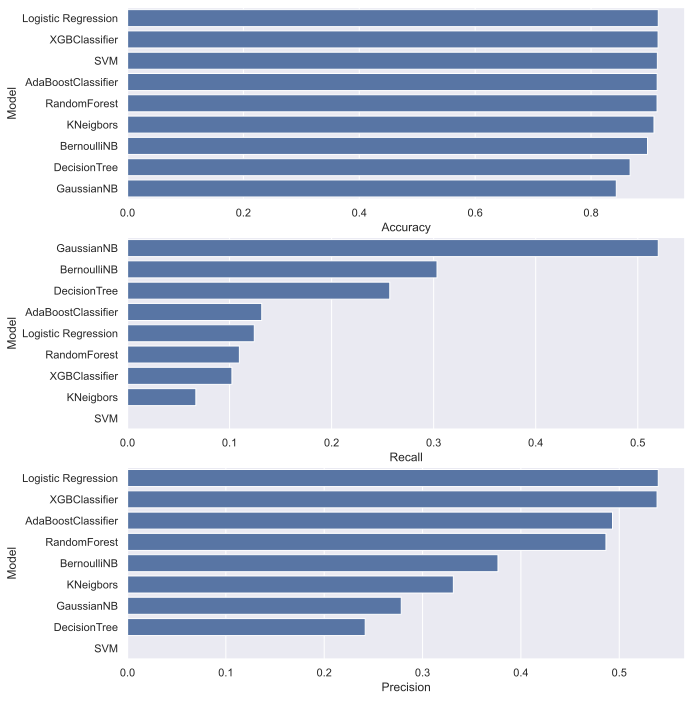

In [46]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
sns.barplot(ax=axs[0], x='Accuracy', y='Model', data=metrics.sort_values(by=['Accuracy'], inplace=False, ascending=False), color='b');
sns.barplot(ax=axs[1], x='Recall', y='Model', data=metrics.sort_values(by=['Recall'], inplace=False, ascending=False), color='b');
sns.barplot(ax=axs[2], x='Precision', y='Model', data=metrics.sort_values(by=['Precision'], inplace=False, ascending=False), color='b');

In this context we are more interested into identifying correctly the persons that are at risk of developing coronary heart disease (CHD) or myocardial infarction (MI). In other words we are more interested into improving Recall rather than Precision. It is better to wrongly classify a healthy person as a person at high risk, rather than classifying wrongly a person that is truly at risk. The top 4 models regarding accuracy are chosen and a grid search is applied in order to find the optimum hyperparameters.

In [47]:
grid_models = [(GradientBoostingClassifier(), [{'learning_rate':[0.01, 0.05, 0.1], "loss":['deviance', 'exponential'], 'n_estimators':[100, 150, 200], 'random_state':[0]}]),
               (LogisticRegression(), [{'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':["saga"], 'random_state':[0]}]),
               (KNeighborsClassifier(), [{'n_neighbors':[5, 7, 8, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (DecisionTreeClassifier(), [{'criterion':['gini','entropy'], 'min_samples_leaf':[1, 2, 3], 'random_state':[0]}]), 
               (RandomForestClassifier() ,[{'n_estimators':[100, 150, 200],'criterion':['gini','entropy'], 'min_samples_leaf':[1, 2, 3], 'random_state':[0]}]),
               (AdaBoostClassifier(), [{'n_estimators':[30, 40, 50], 'learning_rate':[0.8, 0.9, 1.0], 'random_state':[0]}])]

In [48]:
for i, j in tqdm(grid_models):
    grid = GridSearchCV(estimator=i, param_grid=j, scoring='accuracy', cv = 10)
    grid.fit(X_train, y_train)
    score = grid.best_score_
    parameters = grid.best_params_
    print('-'*25)
    print(f'{i}: \n Optimal Accuracy: {round(score*100, 3)}%')
    print(parameters)
    print('-'*25)

 17%|█▋        | 1/6 [05:26<27:14, 326.82s/it]

-------------------------
GradientBoostingClassifier(): 
 Optimal Accuracy: 91.696%
{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 150, 'random_state': 0}
-------------------------


 33%|███▎      | 2/6 [05:41<09:33, 143.34s/it]

-------------------------
LogisticRegression(): 
 Optimal Accuracy: 91.678%
{'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}
-------------------------


 50%|█████     | 3/6 [08:15<07:24, 148.20s/it]

-------------------------
KNeighborsClassifier(): 
 Optimal Accuracy: 91.459%
{'metric': 'manhattan', 'n_neighbors': 10}
-------------------------


 67%|██████▋   | 4/6 [08:19<03:02, 91.07s/it] 

-------------------------
DecisionTreeClassifier(): 
 Optimal Accuracy: 88.68%
{'criterion': 'gini', 'min_samples_leaf': 3, 'random_state': 0}
-------------------------


 83%|████████▎ | 5/6 [13:42<02:54, 174.96s/it]

-------------------------
RandomForestClassifier(): 
 Optimal Accuracy: 91.705%
{'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 200, 'random_state': 0}
-------------------------


100%|██████████| 6/6 [14:15<00:00, 142.54s/it]

-------------------------
AdaBoostClassifier(): 
 Optimal Accuracy: 91.714%
{'learning_rate': 0.8, 'n_estimators': 40, 'random_state': 0}
-------------------------


### Model Training and Results on full data set

In [66]:
X = data_clean.drop(columns=['HeartDisease'])
y = data_clean[['HeartDisease']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=0)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87730
           1       0.58      0.07      0.13      8209

    accuracy                           0.92     95939
   macro avg       0.75      0.53      0.54     95939
weighted avg       0.89      0.92      0.89     95939



Accuracy: 0.916
Recall: 0.075
Presicion: 0.584
ROC AUC: 0.843




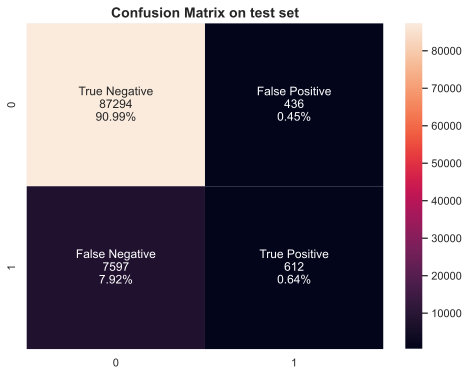

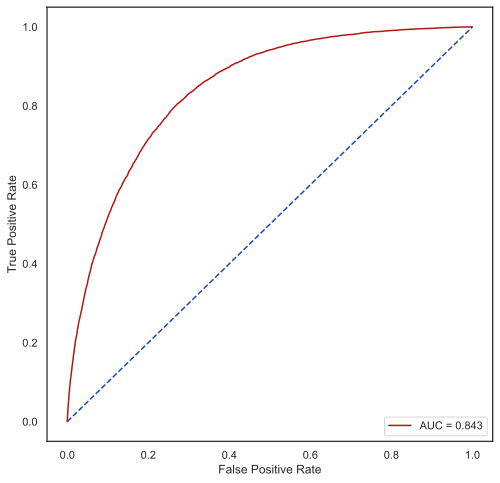

In [68]:
classifier = GradientBoostingClassifier(**{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 150})
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
 
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('\n')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Recall: {round(recall, 3)}')
print(f'Presicion: {round(precision, 3)}')
print(f'ROC AUC: {round(roc_auc_score(y_test, y_prob), 3)}')
print('\n')

results = {"accuracy":[accuracy],"recall":[recall], "precision":[precision], "AUC":[roc_auc_score(y_test, y_prob)]}

# Visualizing Confusion Matrix
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="")
plt.title(label = "Confusion Matrix on test set", weight = "bold", fontsize=14)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observations:
- Results on the full dataset are notthe desired ones.
- Altough the accuracy of the algorithm is high (91.6%) recall is very low (6.9%)
- To compensate sampling techniques are going to be used to deal with the inbalance of the data set.

### Undersampling & Oversampling

In [69]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#### Undersampling

In [70]:
undersampling = {0: y.value_counts()[1], 1: y.value_counts()[1]}
rus = RandomUnderSampler(sampling_strategy=undersampling)
X_rus, y_rus = rus.fit_resample(X, y)

In [71]:
print(f'Before Undersampling:\n {y.value_counts()}')
print('-'*25)
print(f'After Undersampling:\n {y_rus.value_counts()}')

Before Undersampling:
 HeartDisease
0               292422
1                27373
dtype: int64
-------------------------
After Undersampling:
 HeartDisease
0               27373
1               27373
dtype: int64


              precision    recall  f1-score   support

           0       0.98      0.73      0.83     87730
           1       0.22      0.81      0.34      8209

    accuracy                           0.73     95939
   macro avg       0.60      0.77      0.59     95939
weighted avg       0.91      0.73      0.79     95939



Accuracy: 0.733
Recall: 0.807
Presicion: 0.216
ROC AUC: 0.844




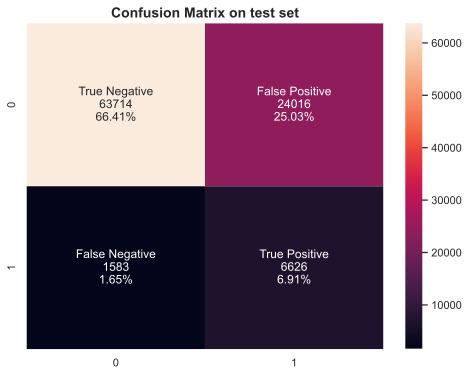

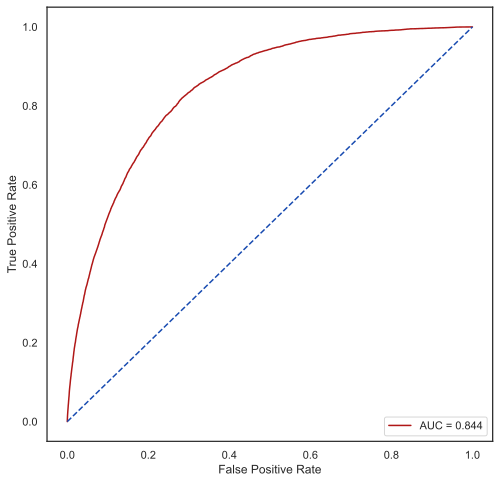

In [72]:
classifier = GradientBoostingClassifier(**{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 150})
classifier.fit(X_rus, y_rus)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
 
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('\n')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Recall: {round(recall, 3)}')
print(f'Presicion: {round(precision, 3)}')
print(f'ROC AUC: {round(roc_auc_score(y_test, y_prob), 3)}')
print('\n')

results["accuracy"].append(accuracy)
results["recall"].append(recall)
results["precision"].append(precision)
results["AUC"].append(roc_auc_score(y_test, y_prob))

# Visualizing Confusion Matrix
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="")
plt.title(label = "Confusion Matrix on test set", weight = "bold", fontsize=14)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Oversampling

In [73]:
oversampling = {0: y.value_counts()[0], 1: y.value_counts()[0]}
ros = RandomOverSampler(sampling_strategy=oversampling)
X_ros, y_ros = ros.fit_resample(X, y)

In [74]:
print(f'Before Oversampling:\n {y.value_counts()}')
print('-'*25)
print(f'After Oversampling:\n {y_ros.value_counts()}')

Before Oversampling:
 HeartDisease
0               292422
1                27373
dtype: int64
-------------------------
After Oversampling:
 HeartDisease
0               292422
1               292422
dtype: int64


              precision    recall  f1-score   support

           0       0.98      0.73      0.83     87730
           1       0.22      0.81      0.34      8209

    accuracy                           0.73     95939
   macro avg       0.60      0.77      0.59     95939
weighted avg       0.91      0.73      0.79     95939



Accuracy: 0.734
Recall: 0.806
Presicion: 0.217
ROC AUC: 0.844




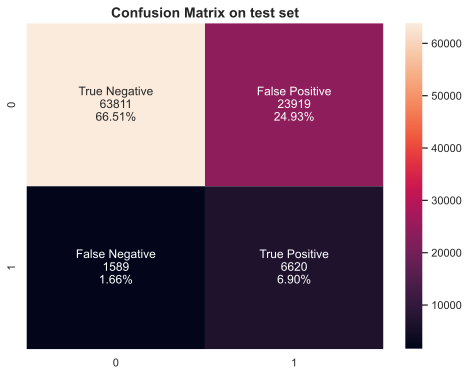

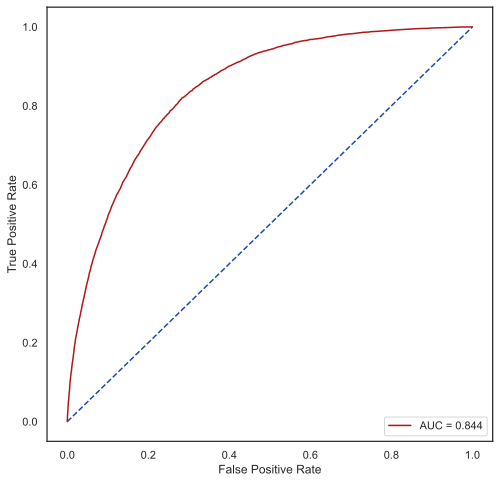

In [75]:
classifier = GradientBoostingClassifier(**{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 150})
classifier.fit(X_ros, y_ros)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
 
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('\n')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Recall: {round(recall, 3)}')
print(f'Presicion: {round(precision, 3)}')
print(f'ROC AUC: {round(roc_auc_score(y_test, y_prob), 3)}')
print('\n')

results["accuracy"].append(accuracy)
results["recall"].append(recall)
results["precision"].append(precision)
results["AUC"].append(roc_auc_score(y_test, y_prob))


# Visualizing Confusion Matrix
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="")
plt.title(label = "Confusion Matrix on test set", weight = "bold", fontsize=14)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
results_df = pd.DataFrame(results, index=["Initial Data", "Undersampled Data", "Oversampled Data"])
round(results_df, 3)

,accuracy,recall,precision,AUC
Initial Data,0.916,0.075,0.584,0.843
Undersampled Data,0.733,0.807,0.216,0.844
Oversampled Data,0.734,0.806,0.217,0.844


Observations:
- Sampling techniques have signifantly improved the performance of the alogrithm regarding Recall.
- Accuracy and Precision are decreased but in this context this does not affect the outcome in a great manner.

**AUC**
- Area under the curve (AUC) is a measure of the accuracy.

**Accuracy**:
- Percent of correct predictions.
- (True positives + True negatives)/(True positives + True Negatives + False Positive + False Negative)

**Recall**:
- Percent of positives rightly predicted.
- True positives/(True positives + False Negative)

**Precision**:
- Percent of negatives rightly predicted.
- True positives/(True positives + False Positives)

#### Variable Importance

                name     score
0        AgeCategory  0.504450
1          GenHealth  0.246481
2                Sex  0.056635
3             Stroke  0.054418
4           Diabetic  0.041322
5        DiffWalking  0.037255
6            Smoking  0.020789
7     PhysicalHealth  0.011203
8      KidneyDisease  0.010038
9                BMI  0.004380
10         SleepTime  0.003824
11            Asthma  0.003700
12              Race  0.003096
13        SkinCancer  0.001120
14      MentalHealth  0.000731
15   AlcoholDrinking  0.000559
16  PhysicalActivity  0.000000


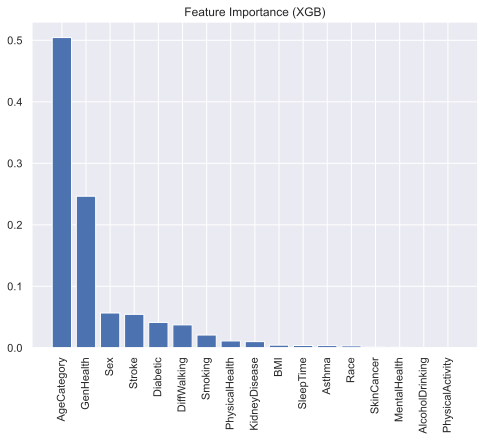

In [77]:
#get feature importances from the model
headers = ["name", "score"]
xgb = model
values = sorted(zip(X_train.columns, classifier.feature_importances_), key=lambda x: x[1], reverse=True)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
sns.set(rc={'figure.figsize':(8,6)})
print(xgb_feature_importances[['name','score']])
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature Importance (XGB)')

plt.show()

### Feature Selection and Model retraining

In [ ]:
# from sklearn.feature_selection import SelectFromModel

In [ ]:
# selection = SelectFromModel(classifier, threshold=0.002, prefit=True)
# select_X_train = selection.transform(X_train)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87730
           1       0.58      0.07      0.13      8209

    accuracy                           0.92     95939
   macro avg       0.75      0.53      0.54     95939
weighted avg       0.89      0.92      0.89     95939



Accuracy: 0.916
Recall: 0.075
Presicion: 0.585
ROC AUC: 0.843




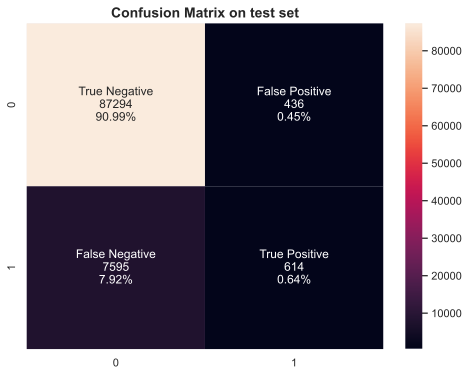

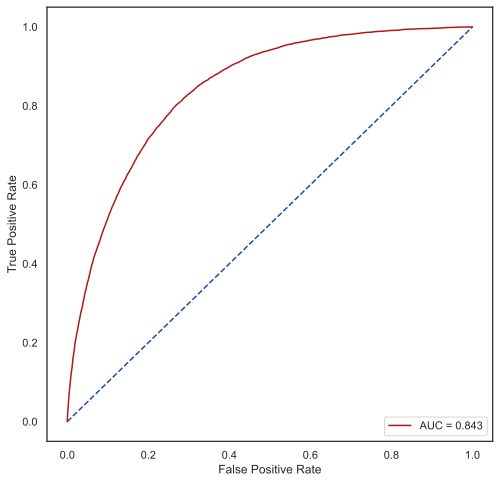

In [ ]:
# classifier = GradientBoostingClassifier(**{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 150})
# classifier.fit(select_X_train, y_train)
# select_X_test = selection.transform(X_test)
# y_pred = classifier.predict(select_X_test)
# y_prob = classifier.predict_proba(select_X_test)[:,1]
# cm = confusion_matrix(y_test, y_pred)
 
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))
# print('\n')
# print(f'Accuracy: {round(accuracy, 3)}')
# print(f'Recall: {round(recall, 3)}')
# print(f'Presicion: {round(precision, 3)}')
# print(f'ROC AUC: {round(roc_auc_score(y_test, y_prob), 3)}')
# print('\n')

# results["accuracy"].append(accuracy)
# results["recall"].append(recall)
# results["precision"].append(precision)
# results["AUC"].append(roc_auc_score(y_test, y_prob))


# # Visualizing Confusion Matrix
# group_names = ["True Negative","False Positive","False Negative","True Positive"]
# group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cm, annot=labels, fmt="")
# plt.title(label = "Confusion Matrix on test set", weight = "bold", fontsize=14)
# plt.show()

# # Roc Curve
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(false_positive_rate, true_positive_rate)

# sns.set_theme(style = 'white')
# plt.figure(figsize = (8, 8))
# plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
# plt.axis('tight')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

### Reccomendation

We developed a model that can predict pretty well if a person is going to experience CHD or MI. The model outputs the probability each individual will experience CHD or MI. As our clients have no technical background, instead of the actual probabilities, we will use a heart disease risk range. More specifically, probabilities will be broken up into 10 heart disease risk buckets with each person now having a heart disease risk from 1 (lowest probability) to 10 (highest probability).

In [97]:
# risk_range = {"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[],"10":[]}

In [99]:
# for prob in y_prob:
#     if prob<0.1:
#         risk_range["1"].append(prob)
#     elif 0.1<=prob<0.2:
#         risk_range["2"].append(prob)
#     elif 0.2<=prob<0.3:
#         risk_range["3"].append(prob)
#     elif 0.3<=prob<0.4:
#         risk_range["4"].append(prob)
#     elif 0.4<=prob<0.5:
#         risk_range["5"].append(prob)
#     elif 0.5<=prob<0.6:
#         risk_range["6"].append(prob)
#     elif 0.6<=prob<0.7:
#         risk_range["7"].append(prob)
#     elif 0.7<=prob<0.8:
#         risk_range["8"].append(prob)
#     elif 0.8<=prob<0.9:
#         risk_range["9"].append(prob)
#     elif prob>0.9:
#         risk_range["10"].append(prob)

In [116]:
# risk_categories = {}

In [117]:
# for key, value in risk_range.items():
#     print(f"Risk Category {key}: {len(value)}")
#     risk_categories.update({key:len(value)})

Risk Category 1: 23827
Risk Category 2: 16601
Risk Category 3: 9599
Risk Category 4: 7821
Risk Category 5: 7586
Risk Category 6: 7315
Risk Category 7: 7800
Risk Category 8: 8356
Risk Category 9: 5708
Risk Category 10: 1326


In [118]:
# risk_categories

{'1': 23827,
 '2': 16601,
 '3': 9599,
 '4': 7821,
 '5': 7586,
 '6': 7315,
 '7': 7800,
 '8': 8356,
 '9': 5708,
 '10': 1326}

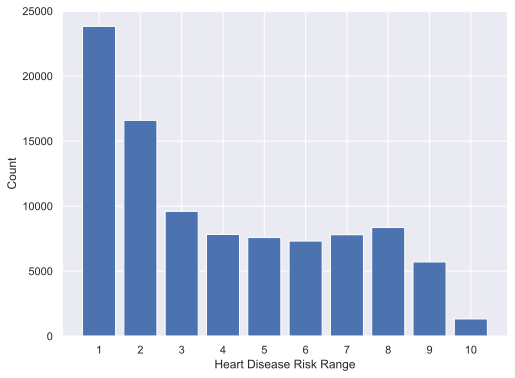

In [121]:
# sns.set(rc={'figure.figsize':(8,6)})
# columns = list(risk_categories.keys())
# values = list(risk_categories.values())
# plt.bar(range(len(risk_categories)), values, tick_label=columns)
# plt.xlabel("Heart Disease Risk Range")
# plt.ylabel("Count")
# plt.show()